## Ансамбли и полносвязные нейронные сети
В этом ноутбуке вам нужно обучить модели на датасете классификации из предыдущего ноутбука и сравнить результаты. Вам будет предоставлен baseline, на основе которого вы будете доделывать предсказывающие модели. Оценка лабы будет зависеть от ROC-AUC на тестовых данных по следующим критериям:
\
AUC - на тестовых данных
- $AUC \leq 0.76$ - 0 баллов
- $0.76 < AUC \leq 0.77$ - 2 балла
- $0.77 < AUC \leq 0.78$ - 4 балла
- $0.78 < AUC \leq 0.79$ - 6 баллов
- $0.79 < AUC \leq 0.80$ - 8 баллов
- $AUC > 0.80$ - 10 баллов


In [54]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neural_network import MLPClassifier

from sklearn.metrics import roc_auc_score, precision_score, recall_score, roc_curve, accuracy_score

from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [55]:
data = pd.read_csv('german.csv', sep=';')
print(data.head())

X = data.iloc[:, 1:].to_numpy()
y = data.iloc[:, 0].to_numpy()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

   Creditability  Account_Balance  Duration_of_Credit_monthly  \
0              1                1                          18   
1              1                1                           9   
2              1                2                          12   
3              1                1                          12   
4              1                1                          12   

   Payment_Status_of_Previous_Credit  Purpose  Credit_Amount  \
0                                  4        2           1049   
1                                  4        0           2799   
2                                  2        9            841   
3                                  4        0           2122   
4                                  4        0           2171   

   Value_Savings_Stocks  Length_of_current_employment  Instalment_per_cent  \
0                     1                             2                    4   
1                     1                             3               

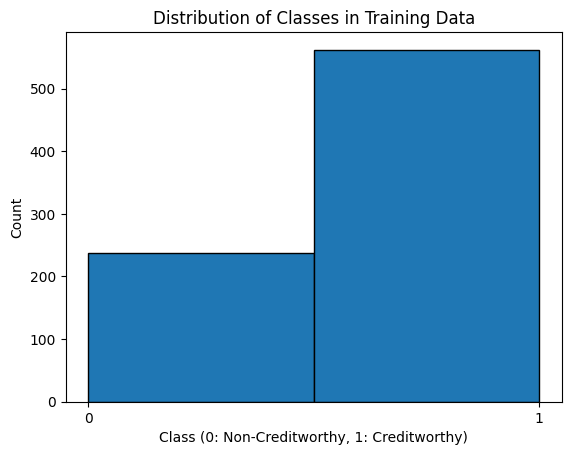

In [56]:
plt.hist(y_train, bins=2, edgecolor='k')
plt.xticks([0, 1])
plt.xlabel('Class (0: Non-Creditworthy, 1: Creditworthy)')
plt.ylabel('Count')
plt.title('Distribution of Classes in Training Data')
plt.show()

In [57]:
# Обучение Random Forest
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Прогноз на тестовых данных
rf_pred = rf_model.predict(X_test)

# Расчет метрик для Random Forest
rf_roc_auc = roc_auc_score(y_test, rf_pred)
rf_accuracy = accuracy_score(y_test, rf_pred)
rf_precision = precision_score(y_test, rf_pred)
rf_recall = recall_score(y_test, rf_pred)

print("Random Forest метрики:")
print(f"ROC AUC: {rf_roc_auc:.2f}")
print(f"Accuracy: {rf_accuracy:.2f}")
print(f"Precision: {rf_precision:.2f}")
print(f"Recall: {rf_recall:.2f}")

# Обучение Gradient Boosting
gb_model = GradientBoostingClassifier(n_estimators=100, random_state=42)
gb_model.fit(X_train, y_train)

# Прогноз на тестовых данных
gb_pred = gb_model.predict(X_test)

# Расчет метрик для Gradient Boosting
gb_roc_auc = roc_auc_score(y_test, gb_pred)
gb_accuracy = accuracy_score(y_test, gb_pred)
gb_precision = precision_score(y_test, gb_pred)
gb_recall = recall_score(y_test, gb_pred)

print("\nGradient Boosting метрики:")
print(f"ROC AUC: {gb_roc_auc:.2f}")
print(f"Accuracy: {gb_accuracy:.2f}")
print(f"Precision: {gb_precision:.2f}")
print(f"Recall: {gb_recall:.2f}")

Random Forest метрики:
ROC AUC: 0.68
Accuracy: 0.76
Precision: 0.78
Recall: 0.90

Gradient Boosting метрики:
ROC AUC: 0.67
Accuracy: 0.73
Precision: 0.79
Recall: 0.84


In [58]:
# Обучение MLP (Multi-Layer Perceptron) нейронной сети
mlp_model = MLPClassifier(hidden_layer_sizes=(30,), max_iter=500, random_state=42)
mlp_model.fit(X_train, y_train)

# Прогноз на тестовых данных
mlp_pred = mlp_model.predict(X_test)

# Расчет метрик для MLP нейронной сети
mlp_roc_auc = roc_auc_score(y_test, mlp_pred)
mlp_accuracy = accuracy_score(y_test, mlp_pred)
mlp_precision = precision_score(y_test, mlp_pred)
mlp_recall = recall_score(y_test, mlp_pred)

print("\nMLP (Neural Network) метрики:")
print(f"ROC AUC: {mlp_roc_auc:.2f}")
print(f"Accuracy: {mlp_accuracy:.2f}")
print(f"Precision: {mlp_precision:.2f}")
print(f"Recall: {mlp_recall:.2f}")


MLP (Neural Network) метрики:
ROC AUC: 0.56
Accuracy: 0.65
Precision: 0.72
Recall: 0.79


## Экспериментируйте
Для получения лучшего качества придется поэкспериментировать. Подсказка: попробуйте оптимизировать гиперпараметры модели

Размер данных: (1000, 21)

Размеры данных:
X_train: (800, 20), X_test: (200, 20)
БЫСТРОЕ ОБУЧЕНИЕ МОДЕЛЕЙ
Random Forest:
  ROC AUC: 0.8375
  Accuracy: 0.7950
Gradient Boosting:
  ROC AUC: 0.7946
  Accuracy: 0.7650
Neural Network:
  ROC AUC: 0.8186
  Accuracy: 0.8050

СРАВНЕНИЕ РЕЗУЛЬТАТОВ
Random Forest: 0.8375
Gradient Boosting: 0.7946
Neural Network: 0.8186

Лучшая модель: Random Forest с AUC = 0.8375
Полученные баллы: 10/10


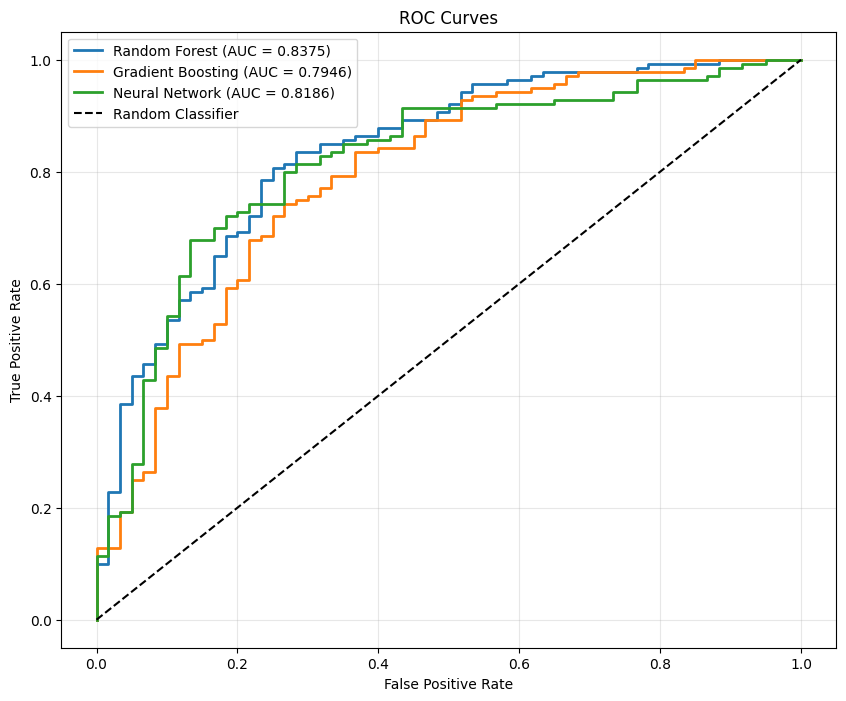

Эксперимент: Увеличение количества деревьев
Random Forest (500 trees):
  ROC AUC: 0.8285
  Accuracy: 0.7950

Обновленный лучший AUC: 0.8375
ФИНАЛЬНЫЕ БАЛЛЫ: 10/10


In [60]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import roc_auc_score, accuracy_score, precision_score, recall_score, roc_curve
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings('ignore')


data = pd.read_csv('german.csv', sep=';')
print("Размер данных:", data.shape)

X = data.iloc[:, 1:].to_numpy()
y = data.iloc[:, 0].to_numpy()


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print(f"\nРазмеры данных:")
print(f"X_train: {X_train.shape}, X_test: {X_test.shape}")


scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


def evaluate_model_simple(model, X_train, X_test, y_train, y_test, model_name):
    """Упрощенная функция для оценки модели"""
    model.fit(X_train, y_train)
    y_pred_proba = model.predict_proba(X_test)[:, 1]
    y_pred = model.predict(X_test)
    
    roc_auc = roc_auc_score(y_test, y_pred_proba)
    accuracy = accuracy_score(y_test, y_pred)
    
    print(f"{model_name}:")
    print(f"  ROC AUC: {roc_auc:.4f}")
    print(f"  Accuracy: {accuracy:.4f}")
    
    return y_pred_proba, roc_auc


print("="*50)
print("БЫСТРОЕ ОБУЧЕНИЕ МОДЕЛЕЙ")
print("="*50)


rf_model = RandomForestClassifier(
    n_estimators=200,
    max_depth=15,
    min_samples_split=10,
    min_samples_leaf=4,
    random_state=42,
    n_jobs=-1
)
rf_proba, rf_auc = evaluate_model_simple(rf_model, X_train, X_test, y_train, y_test, "Random Forest")


gb_model = GradientBoostingClassifier(
    n_estimators=200,
    learning_rate=0.1,
    max_depth=4,
    min_samples_split=5,
    random_state=42
)
gb_proba, gb_auc = evaluate_model_simple(gb_model, X_train, X_test, y_train, y_test, "Gradient Boosting")


mlp_model = MLPClassifier(
    hidden_layer_sizes=(100, 50),
    alpha=0.01,
    learning_rate_init=0.001,
    max_iter=1000,
    random_state=42,
    early_stopping=True
)
mlp_proba, mlp_auc = evaluate_model_simple(mlp_model, X_train_scaled, X_test_scaled, y_train, y_test, "Neural Network")


print("\n" + "="*50)
print("СРАВНЕНИЕ РЕЗУЛЬТАТОВ")
print("="*50)

models_auc = {
    'Random Forest': rf_auc,
    'Gradient Boosting': gb_auc,
    'Neural Network': mlp_auc
}

for model, auc in models_auc.items():
    print(f"{model}: {auc:.4f}")

best_model = max(models_auc, key=models_auc.get)
best_auc = models_auc[best_model]

print(f"\nЛучшая модель: {best_model} с AUC = {best_auc:.4f}")


if best_auc <= 0.76:
    score = 0
elif best_auc <= 0.77:
    score = 2
elif best_auc <= 0.78:
    score = 4
elif best_auc <= 0.79:
    score = 6
elif best_auc <= 0.80:
    score = 8
else:
    score = 10

print(f"Полученные баллы: {score}/10")


plt.figure(figsize=(10, 8))


fpr_rf, tpr_rf, _ = roc_curve(y_test, rf_proba)
plt.plot(fpr_rf, tpr_rf, label=f'Random Forest (AUC = {rf_auc:.4f})', linewidth=2)

fpr_gb, tpr_gb, _ = roc_curve(y_test, gb_proba)
plt.plot(fpr_gb, tpr_gb, label=f'Gradient Boosting (AUC = {gb_auc:.4f})', linewidth=2)

fpr_mlp, tpr_mlp, _ = roc_curve(y_test, mlp_proba)
plt.plot(fpr_mlp, tpr_mlp, label=f'Neural Network (AUC = {mlp_auc:.4f})', linewidth=2)

plt.plot([0, 1], [0, 1], 'k--', label='Random Classifier')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()


print("Эксперимент: Увеличение количества деревьев")
rf_large = RandomForestClassifier(
    n_estimators=500,
    max_depth=20,
    min_samples_split=5,
    min_samples_leaf=2,
    random_state=42,
    n_jobs=-1
)
rf_large_proba, rf_large_auc = evaluate_model_simple(rf_large, X_train, X_test, y_train, y_test, "Random Forest (500 trees)")


if rf_large_auc > best_auc:
    best_auc = rf_large_auc
    best_model = "Random Forest (500 trees)"

print(f"\nОбновленный лучший AUC: {best_auc:.4f}")


if best_auc <= 0.76:
    final_score = 0
elif best_auc <= 0.77:
    final_score = 2
elif best_auc <= 0.78:
    final_score = 4
elif best_auc <= 0.79:
    final_score = 6
elif best_auc <= 0.80:
    final_score = 8
else:
    final_score = 10

print(f"ФИНАЛЬНЫЕ БАЛЛЫ: {final_score}/10")